# SQL Basics

## Database information and schema

The database is taken from Dataquest. The name of the database is superstore.db 

## Initializing connection and creating cursor 

In [1]:
# The database is located here - data/superstore.db. 
# First we will create a connection and open the database cursor through a set of commands as below
file_location = "data/superstore.db"
import sqlite3

conn = sqlite3.connect(file_location) # open a new connection here
db = conn.cursor() # initializing a cursor that would point at the datanbase

query = """
    SELECT orders.order_id, orders.order_date, orders.ship_date, orders.sales
        FROM orders
    LIMIT 10;
"""

db.execute(query)
result = db.fetchall()

for r in result:
    print (r)

('CA-2016-152156', '2016-11-08', '2016-11-11', 261.96)
('CA-2016-152156', '2016-11-08', '2016-11-11', 731.94)
('CA-2016-138688', '2016-06-12', '2016-06-16', 14.62)
('US-2015-108966', '2015-10-11', '2015-10-18', 957.5775)
('US-2015-108966', '2015-10-11', '2015-10-18', 22.368)
('CA-2014-115812', '2014-06-09', '2014-06-14', 48.86)
('CA-2014-115812', '2014-06-09', '2014-06-14', 7.28)
('CA-2014-115812', '2014-06-09', '2014-06-14', 907.152)
('CA-2014-115812', '2014-06-09', '2014-06-14', 18.504)
('CA-2014-115812', '2014-06-09', '2014-06-14', 114.9)


## Checking database PRAGMA

Unlike a SELECT statement, which retrieves data from a table, PRAGMA table_info() retrieves metadata, which is information about a table.

PRAGMA table_info(<table name);

In [2]:
query = """
    PRAGMA table_info(orders)
"""
db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['cid', 'name', 'type', 'notnull', 'dflt_value', 'pk'] 

(0, 'order_id', 'TEXT', 0, None, 0)
(1, 'order_date', 'TEXT', 0, None, 0)
(2, 'ship_date', 'TEXT', 0, None, 0)
(3, 'ship_mode', 'TEXT', 0, None, 0)
(4, 'customer_id', 'TEXT', 0, None, 0)
(5, 'customer_name', 'TEXT', 0, None, 0)
(6, 'segment', 'TEXT', 0, None, 0)
(7, 'country', 'TEXT', 0, None, 0)
(8, 'city', 'TEXT', 0, None, 0)
(9, 'state', 'TEXT', 0, None, 0)
(10, 'postal_code', 'TEXT', 0, None, 0)
(11, 'region', 'TEXT', 0, None, 0)
(12, 'product_id', 'TEXT', 0, None, 0)
(13, 'category', 'TEXT', 0, None, 0)
(14, 'subcategory', 'TEXT', 0, None, 0)
(15, 'product_name', 'TEXT', 0, None, 0)
(16, 'sales', 'REAL', 0, None, 0)
(17, 'quantity', 'INTEGER', 0, None, 0)
(18, 'discount', 'REAL', 0, None, 0)
(19, 'profit', 'REAL', 0, None, 0)


In [3]:
query = """
    PRAGMA table_info(returns)
"""
db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['cid', 'name', 'type', 'notnull', 'dflt_value', 'pk'] 

(0, 'returned', 'TEXT', 0, None, 0)
(1, 'order_date', 'TEXT', 0, None, 0)
(2, 'order_id', 'TEXT', 0, None, 0)
(3, 'customer_id', 'TEXT', 0, None, 0)
(4, 'customer_name', 'TEXT', 0, None, 0)


## Adding a new field in the table

In [4]:
'''
Your manager has requested you find the profit margin on all orders from the orders table.
Write a query that includes order_id, sales, profit, and profit margin (profit divided by sales).
Alias the calculated field as profit_margin.
Only display 8 rows.
'''

query = '''
SELECT order_id, 
       sales, 
       profit, 
       ROUND(profit / sales, 2) AS 'profit_margin'
  FROM orders;
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['order_id', 'sales', 'profit', 'profit_margin'] 

('CA-2016-152156', 261.96, 41.9136, 0.16)
('CA-2016-152156', 731.94, 219.582, 0.3)
('CA-2016-138688', 14.62, 6.8714, 0.47)
('US-2015-108966', 957.5775, -383.031, -0.4)
('US-2015-108966', 22.368, 2.5164, 0.11)
('CA-2014-115812', 48.86, 14.1694, 0.29)
('CA-2014-115812', 7.28, 1.9656, 0.27)
('CA-2014-115812', 907.152, 90.7152, 0.1)
('CA-2014-115812', 18.504, 5.7825, 0.31)
('CA-2014-115812', 114.9, 34.47, 0.3)
('CA-2014-115812', 1706.184, 85.3091999999998, 0.05)
('CA-2014-115812', 911.424, 68.3568, 0.08)
('CA-2017-114412', 15.552, 5.4432, 0.35)
('CA-2016-161389', 407.976, 132.5922, 0.33)
('US-2015-118983', 68.81, -123.858, -1.8)
('US-2015-118983', 2.544, -3.816, -1.5)
('CA-2014-105893', 665.88, 13.3176, 0.02)
('CA-2014-167164', 55.5, 9.98999999999999, 0.18)
('CA-2014-143336', 8.56, 2.4824, 0.29)
('CA-2014-143336', 213.48, 16.011, 0.08)
('CA-2014-143336', 22.72, 7.384, 0.33)
('CA-2016-137330', 19.46, 5.0596, 0.26)
('CA-2016-137330', 60.34, 

## Exercises 

### Even or odd items preferred
**You have been asked to write a query that helps identify whether customers are more likely to purchase an even number of an item or an odd number to help with ordering inventory.** 

***You can do this by dividing the quantity by 2 to help separate results that are whole numbers vs. decimal numbers.***


In [5]:

query = '''
SELECT product_id, 
       quantity,
       CAST (quantity AS REAL) / 2 AS even_or_odd
  FROM orders
LIMIT 5;
'''
db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['product_id', 'quantity', 'even_or_odd'] 

('FUR-BO-10001798', 2, 1.0)
('FUR-CH-10000454', 3, 1.5)
('OFF-LA-10000240', 2, 1.0)
('FUR-TA-10000577', 5, 2.5)
('OFF-ST-10000760', 2, 1.0)


### Calculate rounded price per unit
**Many customers buy multiples of the same item, which makes it difficult to see how much each item costs.Write a query from the orders table that includes order_id, sales, and quantity.
Create a field price_per_unit that divides sales by quantity.
Round price_per_unit to the nearest cent.
Only display 10 rows.**

In [6]:
query = '''
SELECT order_id, 
       sales, 
       quantity,
       ROUND(sales/quantity, 2) AS price_per_unit
  FROM orders
LIMIT 10;
'''
db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['order_id', 'sales', 'quantity', 'price_per_unit'] 

('CA-2016-152156', 261.96, 2, 130.98)
('CA-2016-152156', 731.94, 3, 243.98)
('CA-2016-138688', 14.62, 2, 7.31)
('US-2015-108966', 957.5775, 5, 191.52)
('US-2015-108966', 22.368, 2, 11.18)
('CA-2014-115812', 48.86, 7, 6.98)
('CA-2014-115812', 7.28, 4, 1.82)
('CA-2014-115812', 907.152, 6, 151.19)
('CA-2014-115812', 18.504, 3, 6.17)
('CA-2014-115812', 114.9, 5, 22.98)


## Working with strings - upper / lower / concatinating fields

In [7]:
'''
Perhaps we'd like to put the city and state columns together like this: Henderson, Kentucky.
SQLite uses the concatenate operator (||) to join two strings into one.
'''

query = '''
SELECT city || ", " || UPPER(state) AS "Location"
  FROM orders
LIMIT 10;
'''
db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['Location'] 

('Henderson, KENTUCKY',)
('Henderson, KENTUCKY',)
('Los Angeles, CALIFORNIA',)
('Fort Lauderdale, FLORIDA',)
('Fort Lauderdale, FLORIDA',)
('Los Angeles, CALIFORNIA',)
('Los Angeles, CALIFORNIA',)
('Los Angeles, CALIFORNIA',)
('Los Angeles, CALIFORNIA',)
('Los Angeles, CALIFORNIA',)


## Using Constants

In [8]:
'''
You've been asked to create a table that shows the salary for all the regional managers.
All managers have a salary of 51000
'''



query = '''
SELECT *, 
    51000 AS salary
  FROM managers;
'''
db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['person', 'region', 'salary'] 

('Anna Andreadi', 'West', 51000)
('Chuck Magee', 'East', 51000)
('Kelly Williams', 'Central', 51000)
('Cassandra Brandow', 'South', 51000)


## Challenge: Trying it all together

**We've been asked to write a query that lists the address and total sales amount for each order. The total sales amount includes sales and two other amounts: tax and shipping cost, which are not currently included in the orders table.**

***
**INSTRUCTIONS**

1. Create a field called address that combines city, state, and postal_code in the following format:
    - city, state 99999
2. Create a field called tax that finds 7% of sales, rounded to the nearest cent.
3. Create a field called shipping_cost with a value of 4.99.
4. Create a field called total_cost that adds the values from sales, shipping_cost, and tax together, rounded to the nearest cent.
5. For readability, your final query should include the following fields:
    - address
    - sales
    - tax
    - shipping_cost
    - total_cost
6. Limit your results to 10 rows.

In [9]:
query = '''
SELECT city || ", " || state || " " || postal_code AS address,
       sales, 
       ROUND (sales * 0.07, 2) AS tax,
       4.99 AS shipping_cost,
       ROUND(sales + 4.99 + (sales*0.07), 2) AS total_cost 
   FROM orders 
LIMIT 10;
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['address', 'sales', 'tax', 'shipping_cost', 'total_cost'] 

('Henderson, Kentucky 42420', 261.96, 18.34, 4.99, 285.29)
('Henderson, Kentucky 42420', 731.94, 51.24, 4.99, 788.17)
('Los Angeles, California 90036', 14.62, 1.02, 4.99, 20.63)
('Fort Lauderdale, Florida 33311', 957.5775, 67.03, 4.99, 1029.6)
('Fort Lauderdale, Florida 33311', 22.368, 1.57, 4.99, 28.92)
('Los Angeles, California 90032', 48.86, 3.42, 4.99, 57.27)
('Los Angeles, California 90032', 7.28, 0.51, 4.99, 12.78)
('Los Angeles, California 90032', 907.152, 63.5, 4.99, 975.64)
('Los Angeles, California 90032', 18.504, 1.3, 4.99, 24.79)
('Los Angeles, California 90032', 114.9, 8.04, 4.99, 127.93)


## Order of Execution

1. **FROM:** The first thing SQL does when it runs a query is determine what data it will be looking at. Thus, it executes FROM first.

2. **WHERE:** After executing FROM, SQL filters the results using WHERE.

3. **SELECT:** Next in the order of execution is SELECT. After determining the table we're getting data from and filtering the records, SQL will choose the selected columns.

4. **LIMIT:** Finally, SQL limits the results with LIMIT (if this clause is used in the query).

**The reason order of execution is so important to learn about at this stage of our SQL learning journey is because aliasing, which we've seen in the SELECT clause, cannot be referenced in the WHERE clause, since the alias "doesn't exist" yet.**

In [10]:
'''Your supervisor is curious about the cheapest items sold from the orders table.

Write a query that includes order_id, subcategory, product_name, and a calculated field aliased price_per_unit.
Filter your query so you only see records with a price_per_unit less than $0.50.
'''

query = '''
SELECT order_id,
    subcategory,
    product_name,
    ROUND(sales / quantity, 2) AS price_p_unit
  FROM orders
  WHERE price_p_unit < 0.5; -- This is not a best practice. Shouldn't use aliases in WHERE clasuse 
'''
db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)



['order_id', 'subcategory', 'product_name', 'price_p_unit'] 

('US-2017-118038', 'Binders', 'Economy Binders', 0.42)
('US-2015-161991', 'Binders', 'Round Ring Binders', 0.42)
('US-2015-149692', 'Binders', 'Avery Reinforcements for Hole-Punch Pages', 0.4)
('CA-2014-122567', 'Binders', 'Wilson Jones Easy Flow II Sheet Lifters', 0.36)
('CA-2017-144064', 'Binders', 'Wilson Jones Easy Flow II Sheet Lifters', 0.36)
('CA-2016-169922', 'Binders', 'Computer Printout Index Tabs', 0.34)
('US-2017-102288', 'Appliances', 'Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum', 0.44)
('CA-2014-159310', 'Binders', 'Avery Triangle Shaped Sheet Lifters, Black, 2/Pack', 0.49)
('CA-2017-163860', 'Binders', 'Computer Printout Index Tabs', 0.34)
('CA-2016-108364', 'Binders', 'Wilson Jones Easy Flow II Sheet Lifters', 0.36)
('US-2015-118766', 'Binders', 'Avery Reinforcements for Hole-Punch Pages', 0.4)
('CA-2015-119690', 'Binders', 'Avery Triangle Shaped Sheet Lifters, Black, 2/Pack', 0

## Using comparison operators

**COMPARISON OPERATORS**
<br>
Operator	Description <br>
"="	Equal to <br>
">=" Greater than or equal to <br>
"<=" Less than or equal to <br>
"<>" Not equal to <br>

In [11]:
query = '''
SELECT * FROM orders
WHERE UPPER(customer_name) = "SEAN MILLER"
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'subcategory', 'product_name', 'sales', 'quantity', 'discount', 'profit'] 

('CA-2017-149146', '2017-10-12', '2017-10-12', 'Same Day', 'SM-20320', 'Sean Miller', 'Home Office', 'United States', 'Monroe', 'North Carolina', '28110', 'South', 'OFF-PA-10003919', 'Office Supplies', 'Paper', 'Xerox 1989', 7.968, 2, 0.2, 2.6892)
('CA-2017-145128', '2017-07-09', '2017-07-14', 'Standard Class', 'SM-20320', 'Sean Miller', 'Home Office', 'United States', 'Lafayette', 'Indiana', '47905', 'Central', 'FUR-FU-10000293', 'Furniture', 'Furnishings', 'Eldon Antistatic Chair Mats for Low to Medium Pile Carpets', 526.45, 5, 0.0, 31.587)
('CA-2014-145317', '2014-03-18', '2014-03-23', 'Standard Class', 'SM-20320', 'Sean Miller', 'Home Office', 'United States', 'Jacksonville', 'Florida', '32216', 'South', 'TEC-MA-10003626', 'Technology'

In [12]:
# Using between operator to validate the value between a range of values

'''
Write a query that returns the order_id, product_id, and a field that shows a 10% sales tax on sales, aliased as sales_tax.
Get the records where the resulting sales tax is between 1 and 2 dollars.
'''

query = '''
SELECT order_id, product_id, 
       sales * 0.1 AS sales_tax
  FROM orders
 WHERE sales * 0.1 BETWEEN 1 AND 2;
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['order_id', 'product_id', 'sales_tax'] 

('CA-2016-138688', 'OFF-LA-10000240', 1.462)
('CA-2014-115812', 'OFF-BI-10003910', 1.8504000000000003)
('CA-2017-114412', 'OFF-PA-10002365', 1.5552000000000001)
('CA-2016-137330', 'OFF-AR-10000246', 1.9460000000000002)
('CA-2016-121755', 'OFF-BI-10001634', 1.1648)
('US-2015-150630', 'OFF-AR-10001683', 1.576)
('CA-2016-118255', 'OFF-BI-10003291', 1.7460000000000002)
('CA-2016-105816', 'OFF-FA-10000304', 1.526)
('CA-2016-111682', 'OFF-PA-10000587', 1.4560000000000002)
('CA-2015-135545', 'TEC-AC-10004633', 1.3980000000000001)
('CA-2017-114440', 'OFF-PA-10004675', 1.9050000000000002)
('US-2014-147606', 'FUR-FU-10003194', 1.9300000000000002)
('CA-2016-127208', 'OFF-BI-10002309', 1.674)
('CA-2014-139451', 'OFF-AR-10002053', 1.4900000000000002)
('CA-2017-155558', 'TEC-AC-10001998', 1.9989999999999999)
('CA-2015-149587', 'OFF-PA-10003177', 1.2960000000000003)
('CA-2016-145583', 'OFF-AR-10001149', 1.152)
('CA-2017-106180', 'OFF-EN-10004030', 1.086)
('CA

('CA-2017-148355', 'OFF-BI-10000201', 1.2300000000000002)
('CA-2014-132913', 'OFF-AP-10003278', 1.3970000000000002)
('CA-2017-150266', 'OFF-AR-10001761', 1.8688)
('CA-2017-157469', 'OFF-AR-10001662', 1.9728000000000003)
('CA-2017-159100', 'TEC-AC-10003499', 1.8528)
('CA-2014-103807', 'OFF-PA-10002195', 1.524)
('CA-2017-143084', 'OFF-AR-10002766', 1.3900000000000001)
('CA-2017-143084', 'OFF-EN-10003072', 1.94)
('CA-2016-131639', 'OFF-BI-10001636', 1.3488)
('CA-2016-131639', 'OFF-BI-10000948', 1.1416000000000002)
('CA-2016-161361', 'OFF-PA-10001838', 1.7640000000000002)
('CA-2016-161361', 'OFF-BI-10002215', 1.704)
('US-2016-152415', 'FUR-FU-10002597', 1.4820000000000002)
('CA-2014-138198', 'OFF-BI-10002103', 1.3904)
('CA-2015-165554', 'OFF-PA-10003724', 1.086)
('US-2014-151015', 'OFF-PA-10001184', 1.9136)
('CA-2017-147550', 'FUR-FU-10001918', 1.1352)
('CA-2016-142524', 'OFF-EN-10003286', 1.656)
('CA-2017-166898', 'OFF-PA-10002262', 1.9440000000000002)
('CA-2015-162950', 'OFF-PA-10003177'

In [13]:
# comparison with keyword IN

query = '''
SELECT order_id, product_id, 
       sales * 0.1 AS sales_tax
  FROM orders
 WHERE sales * 0.1 BETWEEN 1 AND 2;
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['order_id', 'product_id', 'sales_tax'] 

('CA-2016-138688', 'OFF-LA-10000240', 1.462)
('CA-2014-115812', 'OFF-BI-10003910', 1.8504000000000003)
('CA-2017-114412', 'OFF-PA-10002365', 1.5552000000000001)
('CA-2016-137330', 'OFF-AR-10000246', 1.9460000000000002)
('CA-2016-121755', 'OFF-BI-10001634', 1.1648)
('US-2015-150630', 'OFF-AR-10001683', 1.576)
('CA-2016-118255', 'OFF-BI-10003291', 1.7460000000000002)
('CA-2016-105816', 'OFF-FA-10000304', 1.526)
('CA-2016-111682', 'OFF-PA-10000587', 1.4560000000000002)
('CA-2015-135545', 'TEC-AC-10004633', 1.3980000000000001)
('CA-2017-114440', 'OFF-PA-10004675', 1.9050000000000002)
('US-2014-147606', 'FUR-FU-10003194', 1.9300000000000002)
('CA-2016-127208', 'OFF-BI-10002309', 1.674)
('CA-2014-139451', 'OFF-AR-10002053', 1.4900000000000002)
('CA-2017-155558', 'TEC-AC-10001998', 1.9989999999999999)
('CA-2015-149587', 'OFF-PA-10003177', 1.2960000000000003)
('CA-2016-145583', 'OFF-AR-10001149', 1.152)
('CA-2017-106180', 'OFF-EN-10004030', 1.086)
('CA

### Exercise IN operator 

Your manager wants to celebrate Pi Day (March 14th) by offering a promotion on sales that cost exactly $3, $14, or $15 in honor of the first 5 digits of pi (3.1415), but has asked you to check if there are enough sales with those amounts to be worth it.

Write a query that includes order_id, product_name, sales, and quantity from the orders table.
Include only the following sales amounts:
3
14
15

In [14]:

query = '''
SELECT order_id, 
       product_name,
       sales,
       quantity
  FROM orders
 WHERE sales IN (3, 14, 15);
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['order_id', 'product_name', 'sales', 'quantity'] 

('CA-2014-131905', 'Avery 480', 15.0, 4)
('CA-2016-111409', 'Avery 480', 3.0, 1)
('CA-2014-133830', 'Advantus Plastic Paper Clips', 15.0, 3)
('US-2017-132031', 'Avery 496', 3.0, 1)
('CA-2016-126627', 'Eldon 400 Class Desk Accessories, Black Carbon', 14.0, 4)


## NULL values - Finding NULL values

In [15]:
query = '''
SELECT order_id, 
       postal_code
  FROM orders
 WHERE postal_code = NULL;
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['order_id', 'postal_code'] 



In SQL, conditions can evaluate to True or False, but they can also evaluate as "unknown". This is known as three-valued logic. Unless something is true, WHERE won't capture it, hence the behavior above.

To check if the value is NULL or not you need to use IS or IS NOT as below. 

In [16]:
query = '''
SELECT order_id, 
       postal_code
  FROM orders
 WHERE postal_code IS NULL;
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['order_id', 'postal_code'] 

('CA-2017-104066', None)
('CA-2015-162887', None)
('US-2016-150140', None)
('US-2016-165505', None)
('US-2016-165505', None)
('US-2016-165505', None)
('US-2017-127292', None)
('US-2017-127292', None)
('US-2017-127292', None)
('US-2017-127292', None)
('CA-2015-117086', None)


## AND and OR operators in WHERE clause

In [17]:
query = '''
SELECT product_name, sales,
       category, region
  FROM orders
 WHERE category = 'Office Supplies'
   AND region = 'West';
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['product_name', 'sales', 'category', 'region'] 

('Self-Adhesive Address Labels for Typewriters by Universal', 14.62, 'Office Supplies', 'West')
('Newell 322', 7.28, 'Office Supplies', 'West')
('DXL Angle-View Binders with Locking Rings by Samsill', 18.504, 'Office Supplies', 'West')
('Belkin F5C206VTEL 6 Outlet Surge', 114.9, 'Office Supplies', 'West')
('Fellowes PB200 Plastic Comb Binding Machine', 407.976, 'Office Supplies', 'West')
('Fellowes Super Stor/Drawer', 55.5, 'Office Supplies', 'West')
('Newell 341', 8.56, 'Office Supplies', 'West')
('Wilson Jones Hanging View Binder, White, 1"', 22.72, 'Office Supplies', 'West')
('Wilson Jones Active Use Binders', 11.648, 'Office Supplies', 'West')
('Eldon Base for stackable storage shelf, platinum', 77.88, 'Office Supplies', 'West')
('Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 14 7/8" X 11"', 25.824, 'Office Supplies', 'West')
('Xerox 1943', 146.73, 'Office Supplies', 'West')
('Hunt BOSTON Model 1606 High-Volume Electric P

# Strings and Categories

## Finding unique values through SELECT DISTINCT

In [18]:
# Select distinct gives you unique combinations of the field
# In this example it gives us unique categories, that are 3
query = '''
SELECT DISTINCT category 
  FROM orders
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['category'] 

('Furniture',)
('Office Supplies',)
('Technology',)


In [19]:
# In this example it gives us unique combination of categories, subcategories and segments

query = '''
SELECT DISTINCT category, subcategory, segment
  FROM orders
  ORDER BY category, subcategory
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

['category', 'subcategory', 'segment'] 

('Furniture', 'Bookcases', 'Consumer')
('Furniture', 'Bookcases', 'Home Office')
('Furniture', 'Bookcases', 'Corporate')
('Furniture', 'Chairs', 'Consumer')
('Furniture', 'Chairs', 'Home Office')
('Furniture', 'Chairs', 'Corporate')
('Furniture', 'Furnishings', 'Consumer')
('Furniture', 'Furnishings', 'Corporate')
('Furniture', 'Furnishings', 'Home Office')
('Furniture', 'Tables', 'Consumer')
('Furniture', 'Tables', 'Corporate')
('Furniture', 'Tables', 'Home Office')
('Office Supplies', 'Appliances', 'Consumer')
('Office Supplies', 'Appliances', 'Home Office')
('Office Supplies', 'Appliances', 'Corporate')
('Office Supplies', 'Art', 'Consumer')
('Office Supplies', 'Art', 'Corporate')
('Office Supplies', 'Art', 'Home Office')
('Office Supplies', 'Binders', 'Consumer')
('Office Supplies', 'Binders', 'Home Office')
('Office Supplies', 'Binders', 'Corporate')
('Office Supplies', 'Envelopes', 'Consumer')
('Office Supplies', 'Envelopes', 'Home Office'

In [20]:
'''
The Eastern regional manager wants a list of all order IDs and customer names from Buffalo, New York.

Write a query that includes a list of all unique order_id and customer_name values.
Filter the results to the city of Buffalo in the state of New York.

'''

query = '''
SELECT DISTINCT order_id, customer_name 
	FROM orders
	WHERE city = 'Buffalo'
'''

db.execute(query)
result = db.fetchall()
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)



['order_id', 'customer_name'] 

('CA-2015-132570', 'Kean Thornton')
('US-2016-142685', 'Maureen Gnade')
('CA-2014-150301', 'Michelle Huthwaite')
('CA-2014-128209', 'Greg Tran')
('CA-2015-166947', 'Edward Becker')
('CA-2017-112844', 'Stefania Perrino')
('CA-2014-167486', "Jack O'Briant")


## Text patterns through LIKE 

Remember that LIKE is case insensitive but if we wish to make it case sensitive, we can use the following statement. 
<br>
**PRAGMA case_sensitive_like = true**

In [21]:
'''
You have been asked to find the product names for all keyboard-related items that Superstore sells.

Write a query that includes all unique values for subcategory and product_name.
Filter your results to products related to keyboards.

'''

query = '''
SELECT DISTINCT subcategory, product_name
    FROM orders
    WHERE product_name LIKE '%keyboard%'
'''

db.execute(query)
result = db.fetchall()
print(f"{len(result)} rows found .... \n")
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)


34 rows found .... 

['subcategory', 'product_name'] 

('Accessories', 'Logitech K350 2.4Ghz Wireless Keyboard')
('Accessories', 'Logitech\xa0Gaming G510s - Keyboard')
('Accessories', 'HP Standard 104 key PS/2 Keyboard')
('Accessories', 'Microsoft Natural Keyboard Elite')
('Accessories', 'Logitech Media Keyboard K200')
('Accessories', 'KeyTronic\xa06101 Series -\xa0Keyboard\xa0- Black')
('Accessories', 'Belkin QODE FastFit Bluetooth Keyboard')
('Accessories', 'Enermax Aurora Lite Keyboard')
('Accessories', 'Logitech\xa0Illuminated - Keyboard')
('Accessories', 'Logitech Wireless Touch Keyboard K400')
('Accessories', 'Microsoft Natural Ergonomic Keyboard 4000')
('Accessories', 'Logitech G19 Programmable Gaming Keyboard')
('Accessories', 'Anker Ultrathin Bluetooth Wireless Keyboard Aluminum Cover with Stand ')
('Accessories', 'Enermax Acrylux Wireless Keyboard')
('Accessories', 'Case Logic 2.4GHz Wireless Keyboard')
('Accessories', 'Logitech Desktop MK120 Mouse and keyboard Combo')
('Phon

Use _ with LIKE helps you identify a single character. Check the examples below:

In [22]:
'''
Print unique states with only 5 letters
'''

query = '''
SELECT DISTINCT state
    FROM orders
    WHERE state LIKE '_____'
'''

db.execute(query)
result = db.fetchall()
print(f"{len(result)} rows found .... \n")
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)


3 rows found .... 

['state'] 

('Texas',)
('Maine',)
('Idaho',)


**EXERCISE** <br><br>
A new product shipment has come into the warehouse, but the product label was damaged during transport so we can't tell what the product is called.

We can tell that the first word has five letters and the second word has seven letters, but we don't know how many letters are in the final word.

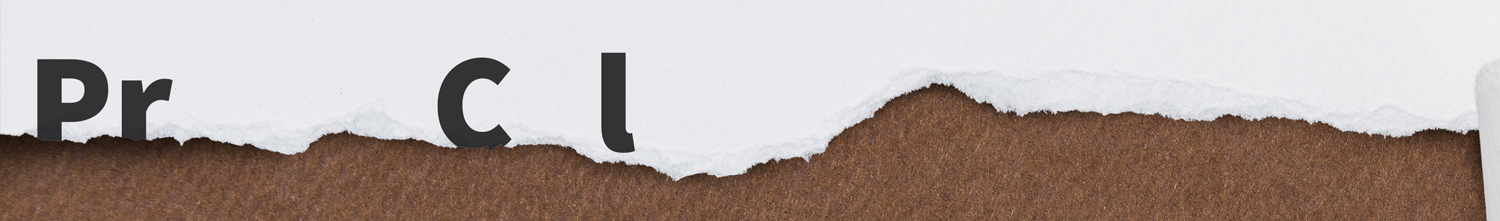

In [23]:


query = '''
SELECT DISTINCT product_name
  FROM orders
 WHERE product_name LIKE 'Pr___ C_l____ %'
 
 '''

db.execute(query)
result = db.fetchall()
print(f"{len(result)} rows found .... \n")
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

1 rows found .... 

['product_name'] 

('Prang Colored Pencils',)


# Conditional Statements

## Using CASE END block


Two new leadership positions have been created at Superstore:Territory Supervisors, who each oversee two regions. 
- Territory 1 consists of the Central and South regions, whereas 
- Territory 2 is made up of the West and East regions. 
The new Territory Supervisors have requested sales information about their areas.

Write a query that includes order_id, state, sales, and a new column named territory.
For territory, use a CASE expression to categorize the 'Central' and 'South' regions from region as 'Territory 1' and the remaining regions as 'Territory 2'.

In [24]:
query = '''
SELECT
    order_id, 
    state, 
    sales,
    
    CASE
        WHEN region IN ('Central', 'South') THEN 'Territory 1'
        ELSE 'Territory 2'
    END AS territory
FROM 
    orders
'''

db.execute(query)
result = db.fetchall()
print(f"{len(result)} rows found .... \n")
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

9994 rows found .... 

['order_id', 'state', 'sales', 'territory'] 

('CA-2016-152156', 'Kentucky', 261.96, 'Territory 1')
('CA-2016-152156', 'Kentucky', 731.94, 'Territory 1')
('CA-2016-138688', 'California', 14.62, 'Territory 2')
('US-2015-108966', 'Florida', 957.5775, 'Territory 1')
('US-2015-108966', 'Florida', 22.368, 'Territory 1')
('CA-2014-115812', 'California', 48.86, 'Territory 2')
('CA-2014-115812', 'California', 7.28, 'Territory 2')
('CA-2014-115812', 'California', 907.152, 'Territory 2')
('CA-2014-115812', 'California', 18.504, 'Territory 2')
('CA-2014-115812', 'California', 114.9, 'Territory 2')
('CA-2014-115812', 'California', 1706.184, 'Territory 2')
('CA-2014-115812', 'California', 911.424, 'Territory 2')
('CA-2017-114412', 'North Carolina', 15.552, 'Territory 1')
('CA-2016-161389', 'Washington', 407.976, 'Territory 2')
('US-2015-118983', 'Texas', 68.81, 'Territory 1')
('US-2015-118983', 'Texas', 2.544, 'Territory 1')
('CA-2014-105893', 'Wisconsin', 665.88, 'Territory 

('CA-2014-159835', 'Pennsylvania', 657.93, 'Territory 2')
('CA-2017-112956', 'Maryland', 277.4, 'Territory 2')
('CA-2017-112956', 'Maryland', 25.16, 'Territory 2')
('CA-2017-112956', 'Maryland', 91.92, 'Territory 2')
('CA-2016-119683', 'New York', 29.34, 'Territory 2')
('CA-2014-163559', 'New York', 139.44, 'Territory 2')
('CA-2014-140228', 'Ohio', 6.912, 'Territory 2')
('CA-2014-140228', 'Ohio', 27.096, 'Territory 2')
('CA-2014-140228', 'Ohio', 177.568, 'Territory 2')
('US-2016-131674', 'Texas', 58.416, 'Territory 1')
('CA-2015-110093', 'Pennsylvania', 16.448, 'Territory 2')
('CA-2015-110093', 'Pennsylvania', 36.784, 'Territory 2')
('CA-2017-112529', 'Texas', 718.116, 'Territory 1')
('CA-2017-112529', 'Texas', 31.776, 'Territory 1')
('CA-2016-154536', 'Pennsylvania', 9.555, 'Territory 2')
('CA-2017-141929', 'California', 487.984, 'Territory 2')
('CA-2017-141929', 'California', 5.56, 'Territory 2')
('CA-2017-141929', 'California', 217.85, 'Territory 2')
('CA-2016-109743', 'Tennessee', 

('CA-2016-150483', 'Illinois', 18.496, 'Territory 1')
('CA-2016-150483', 'Illinois', 191.079, 'Territory 1')
('CA-2016-150483', 'Illinois', 10.368, 'Territory 1')
('US-2016-126431', 'New York', 30.53, 'Territory 2')
('US-2016-126431', 'New York', 30.84, 'Territory 2')
('US-2016-126431', 'New York', 75.06, 'Territory 2')
('CA-2016-139934', 'California', 66.976, 'Territory 2')
('CA-2015-109603', 'California', 182.72, 'Territory 2')
('CA-2017-160661', 'Massachusetts', 21.93, 'Territory 2')
('CA-2017-102610', 'Tennessee', 95.976, 'Territory 1')
('CA-2017-102610', 'Tennessee', 143.928, 'Territory 1')
('CA-2017-102610', 'Tennessee', 3.564, 'Territory 1')
('CA-2017-102610', 'Tennessee', 4.928, 'Territory 1')
('US-2016-144057', 'Texas', 856.656, 'Territory 1')
('US-2016-144057', 'Texas', 13.184, 'Territory 1')
('US-2016-144057', 'Texas', 48.784, 'Territory 1')
('US-2016-144057', 'Texas', 76.64, 'Territory 1')
('US-2016-144057', 'Texas', 18.528, 'Territory 1')
('CA-2014-160276', 'Virginia', 177

In [25]:
conn.close()

# Project

## Description of the project and setup connection and cursor
For this guided project, you'll take on the role of a data analyst at a startup. The product team is considering launching a campaign on Kickstarter to test the viability of some offerings. You've been asked to pull data that will help the team understand what might influence the success of a campaign. The data source is a selection of fields from Kaggle.

Specifically, we'll answer the following questions:
1. What types of projects are most likely to be successful?
2. Which projects fail?

In [26]:
# First, let's open the connection and create a cursor

file_path = "data/ksprojects.db"

conn = sqlite3.connect(file_path)
db = conn.cursor()

# Additionally, we are implementing a function that would execute the query with the db cursor and print the outcome 
def print_query_outcome(db, query):
    db.execute(query)
    result = db.fetchall()
    print(f"{len(result)} rows found .... \n")
    headers = [h[0] for h in db.description] # If you want the column header
    print(headers ,'\n')
    for r in result:
        print(r)

## Task 1: List the fields and data type

In [27]:
'''This database consists of one table, ksprojects.
List the names and data types for each table in the database.'''


query = '''
    PRAGMA table_info(ksprojects)
'''

db.execute(query)
result = db.fetchall()
print(f"{len(result)} rows found .... \n")
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

8 rows found .... 

['cid', 'name', 'type', 'notnull', 'dflt_value', 'pk'] 

(0, 'ID', 'INTEGER', 0, None, 0)
(1, 'name', 'TEXT', 0, None, 0)
(2, 'category', 'TEXT', 0, None, 0)
(3, 'main_category', 'TEXT', 0, None, 0)
(4, 'goal', 'REAL', 0, None, 0)
(5, 'pledged', 'REAL', 0, None, 0)
(6, 'state', 'TEXT', 0, None, 0)
(7, 'backers', 'INTEGER', 0, None, 0)


## Task 2: Initial Selection of Rows and Columns

Pull the relevant columns from the ksprojects table that will allow us to assess a project's result based on its main category, amount of money set as a goal, number of backers, and amount of money pledged. Return just the first 10 rows.

In [28]:
query = '''
    SELECT
        main_category,
        goal,
        backers,
        pledged
    FROM ksprojects
    LIMIT 10
'''

db.execute(query)
result = db.fetchall()
print(f"{len(result)} rows found .... \n")
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

10 rows found .... 

['main_category', 'goal', 'backers', 'pledged'] 

('Publishing', 1000.0, 0, 0.0)
('Film & Video', 30000.0, 15, 2421.0)
('Film & Video', 45000.0, 3, 220.0)
('Music', 5000.0, 1, 1.0)
('Film & Video', 19500.0, 14, 1283.0)
('Food', 50000.0, 224, 52375.0)
('Food', 1000.0, 16, 1205.0)
('Food', 25000.0, 40, 453.0)
('Design', 125000.0, 58, 8233.0)
('Film & Video', 65000.0, 43, 6240.57)


## Task 3: Filtering by Category

Now that you've selected the relevant columns, we'll filter the data to include only those in certain categories.

Thomas Edison famously said, "I have not failed. I've just found 10,000 ways that won't work." To that end, your product team would like to know more about the projects that weren't successful.

**Repeat your query from the previous screen, but this time only keep the records where the project state is either 'failed', 'canceled', or 'suspended'.**

In [29]:
query = '''
    SELECT
        main_category,
        goal,
        backers,
        pledged
    FROM ksprojects
    WHERE state IN ('failed', 'canceled', 'suspended')
    LIMIT 10
'''

db.execute(query)
result = db.fetchall()
print(f"{len(result)} rows found .... \n")
headers = [h[0] for h in db.description] # If you want the column header
print(headers ,'\n')
for r in result:
    print(r)

10 rows found .... 

['main_category', 'goal', 'backers', 'pledged'] 

('Publishing', 1000.0, 0, 0.0)
('Film & Video', 30000.0, 15, 2421.0)
('Film & Video', 45000.0, 3, 220.0)
('Music', 5000.0, 1, 1.0)
('Film & Video', 19500.0, 14, 1283.0)
('Food', 25000.0, 40, 453.0)
('Design', 125000.0, 58, 8233.0)
('Film & Video', 65000.0, 43, 6240.57)
('Publishing', 2500.0, 0, 0.0)
('Crafts', 5000.0, 0, 0.0)


## Task 4: Filtering by Quantity
Expand your query from the previous screen to find which of these projects had at least 100 backers and at least $20,000 pledged.

In [30]:
query = '''
SELECT main_category, goal, backers, pledged
  FROM ksprojects
 WHERE state IN ('failed', 'canceled', 'suspended')
   AND backers >= 100
   AND pledged >= 20000
 LIMIT 10
'''

print_query_outcome(db, query)

10 rows found .... 

['main_category', 'goal', 'backers', 'pledged'] 

('Technology', 250000.0, 120, 90771.0)
('Design', 25000.0, 647, 39693.0)
('Technology', 5000.0, 103, 61416.0)
('Art', 100000.0, 257, 50230.0)
('Film & Video', 150000.0, 135, 23098.0)
('Film & Video', 50000.0, 189, 20677.0)
('Film & Video', 100000.0, 118, 25877.0)
('Technology', 60000.0, 108, 45687.01)
('Technology', 50000.0, 209, 33916.0)
('Technology', 96485.0, 310, 85017.0)


## Ordering Results

Continue building on your query from the previous screen. This time, you'll sort the results by two fields:

Main category sorted in ascending order.
A calculated field called pct_pledged, which divides pledged by goal. Sort this field in descending order. (Add pct_pledged to the SELECT clause, too.)
Now, modify your query so that only projects in a failed state are returned.

In [31]:
query =  '''
SELECT main_category, backers, pledged, goal, 
       pledged / goal AS pct_pledged
  FROM ksprojects
 WHERE state = 'failed'
   AND backers >= 100 AND pledged >= 20000
 ORDER BY main_category ASC, pct_pledged DESC
 LIMIT 10;
 '''

print_query_outcome(db, query)

10 rows found .... 

['main_category', 'backers', 'pledged', 'goal', 'pct_pledged'] 

('Art', 315, 49191.0, 50000.0, 0.98382)
('Art', 294, 52565.25, 60000.0, 0.8760875)
('Art', 172, 21310.0, 25000.0, 0.8524)
('Art', 185, 27630.24, 35000.0, 0.7894354285714286)
('Art', 552, 37621.97, 50000.0, 0.7524394)
('Art', 159, 31657.0, 45000.0, 0.7034888888888889)
('Art', 336, 33485.0, 52000.0, 0.6439423076923076)
('Art', 130, 20374.99, 35000.0, 0.5821425714285715)
('Art', 133, 54387.0, 100000.0, 0.54387)
('Art', 136, 39206.49, 77777.0, 0.5040884837419802)


## Applying Conditional Logic

1. Create a field funding_status that applies the following logic based on the percentage of amount pledged to campaign goal:

- If the percentage pledged is greater than or equal to 1, then the project is "Fully funded."
- If the percentage pledged is between 75% and 100%, then the project is "Nearly funded."
- If the percentage pledged is less than 75%, then the project is "Not nearly funded."
2. Write either a line or block comment with your observations about the funding status of the sample output. For example, are these failed projects failing because they don't have any backers or funding?

In [32]:
query = '''
  SELECT main_category, backers, pledged, goal,
         pledged / goal AS pct_pledged,
    CASE
         WHEN (pledged / goal) >= 1 THEN 'Fully funded'
         WHEN (pledged / goal) BETWEEN 0.75 AND 1 THEN 'Nearly funded'
         ELSE 'Not nearly funded'
    END AS funding_status
    
    FROM ksprojects
   WHERE state IN ('failed')
     AND backers >= 100 AND pledged >= 20000
ORDER BY main_category, pct_pledged DESC;
'''

print_query_outcome(db, query)

conn.close()

1470 rows found .... 

['main_category', 'backers', 'pledged', 'goal', 'pct_pledged', 'funding_status'] 

('Art', 315, 49191.0, 50000.0, 0.98382, 'Nearly funded')
('Art', 294, 52565.25, 60000.0, 0.8760875, 'Nearly funded')
('Art', 172, 21310.0, 25000.0, 0.8524, 'Nearly funded')
('Art', 185, 27630.24, 35000.0, 0.7894354285714286, 'Nearly funded')
('Art', 552, 37621.97, 50000.0, 0.7524394, 'Nearly funded')
('Art', 159, 31657.0, 45000.0, 0.7034888888888889, 'Not nearly funded')
('Art', 336, 33485.0, 52000.0, 0.6439423076923076, 'Not nearly funded')
('Art', 130, 20374.99, 35000.0, 0.5821425714285715, 'Not nearly funded')
('Art', 133, 54387.0, 100000.0, 0.54387, 'Not nearly funded')
('Art', 136, 39206.49, 77777.0, 0.5040884837419802, 'Not nearly funded')
('Art', 257, 50230.0, 100000.0, 0.5023, 'Not nearly funded')
('Art', 115, 27413.0, 80000.0, 0.3426625, 'Not nearly funded')
('Art', 393, 24183.0, 75000.0, 0.32244, 'Not nearly funded')
('Art', 322, 31940.0, 100000.0, 0.3194, 'Not nearly fun

# Aggregate Functions in SQL 

So far we have worked on scaler functions - now we will work on aggregate functions. The difference between scaler and aggregate functions can be described with the below diagram.

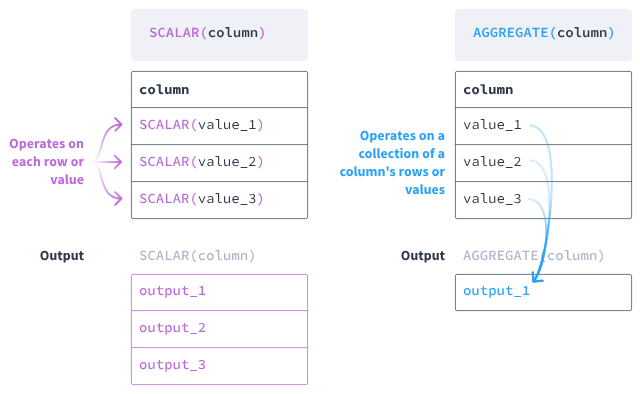

In this part we will work on Chinook database https://github.com/lerocha/chinook-database

The database is locally stored as data/chinook.db 

**ERD of the database is here**
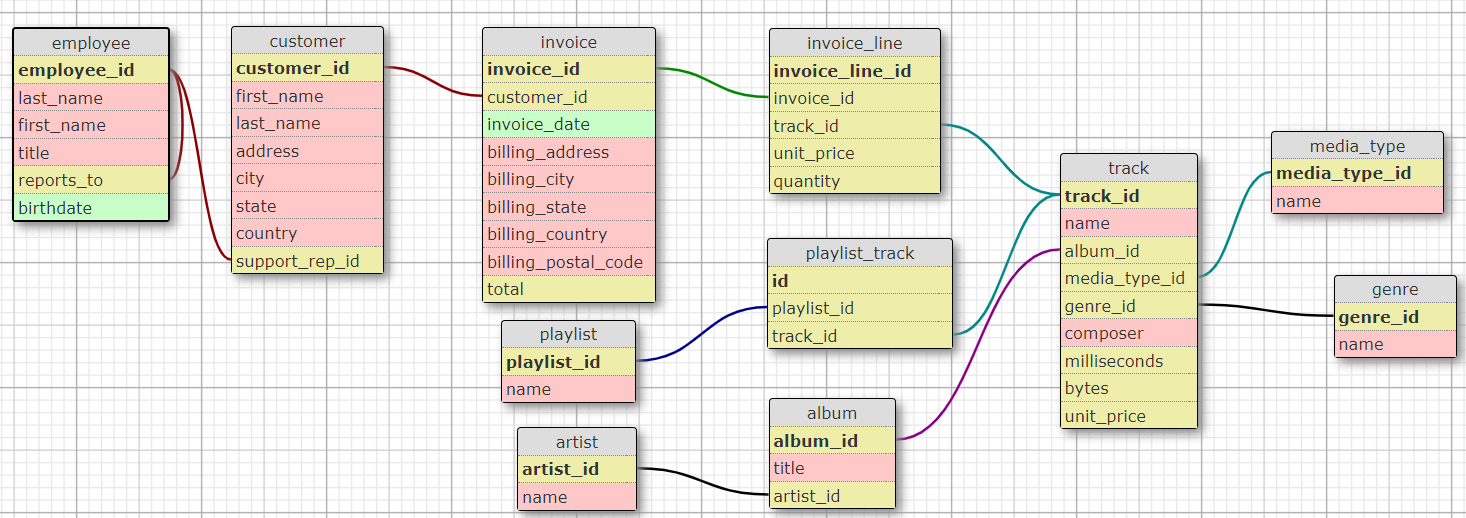

In [33]:
# Initialize the connection and implement the print function. 
chinook_path = "data/chinook.db"
conn = sqlite3.connect(chinook_path)

# Initiate a cursor 
chinook = conn.cursor()

## Some common aggregate functions

In [34]:
query = '''
SELECT invoice_id, customer_id, invoice_date, billing_country, total
  FROM invoice
 LIMIT 3
'''

print_query_outcome(chinook, query)

3 rows found .... 

['invoice_id', 'customer_id', 'invoice_date', 'billing_country', 'total'] 

(1, 18, '2017-01-03 00:00:00', 'USA', 15.84)
(2, 30, '2017-01-03 00:00:00', 'Canada', 9.9)
(3, 40, '2017-01-05 00:00:00', 'France', 1.98)


In [35]:
query = '''
SELECT ROUND(SUM(total),2) as overall_sale, 
       COUNT(total) AS total_invoices, 
       ROUND(SUM(total) / COUNT(total),2) AS average_sale_per_invoice
    FROM invoice;
    
'''

print_query_outcome(chinook, query)

1 rows found .... 

['overall_sale', 'total_invoices', 'average_sale_per_invoice'] 

(4709.43, 614, 7.67)


In [36]:
# Column average - AVG function

query = '''SELECT AVG(total) AS avg_sale
  FROM invoice
  '''

print_query_outcome(chinook, query)

1 rows found .... 

['avg_sale'] 

(7.670081433224746,)


In [37]:
# Query to find minimum 
query1 = '''
SELECT MIN(total) AS min_sale
  FROM invoice
'''

# Query to find maximum value
query2 = '''
SELECT MAX(total) AS max_sale
  FROM invoice
'''

# Query to find BOTH
query3 = '''
SELECT MIN(total) AS min_sale, MAX(total) AS max_sale
  FROM invoice
'''

print_query_outcome(chinook, query1)
print_query_outcome(chinook, query2)
print_query_outcome(chinook, query3)

1 rows found .... 

['min_sale'] 

(0.99,)
1 rows found .... 

['max_sale'] 

(23.759999999999998,)
1 rows found .... 

['min_sale', 'max_sale'] 

(0.99, 23.759999999999998)


In [38]:
# Finding non NULL values
query = '''
SELECT COUNT(composer) AS num_composers
  FROM track
 WHERE composer IS NOT NULL 
'''

print_query_outcome(chinook, query)

1 rows found .... 

['num_composers'] 

(2525,)


In [39]:
# Summary Statistics Under a Condition
'''
Now, we want to determine how long it will take us to listen to only the tracks that cost $1.99 (without a break).

'''

query = '''
SELECT SUM(milliseconds / 1000.0 / 60) AS total_runtime_minutes
  FROM track
  WHERE unit_price = 1.99
'''

print_query_outcome(chinook, query)

1 rows found .... 

['total_runtime_minutes'] 

(8351.58261666667,)


In [40]:
# Several statistics calculated based on two condidions.

query = '''
SELECT COUNT(invoice_id) AS num_row, 
       MIN(total) AS min_total,
       MAX(total) AS max_total,
       ROUND(AVG(total), 2) AS avg_total_rounded
FROM invoice
WHERE billing_country = 'USA' AND total > 10
'''

print_query_outcome(chinook, query)

1 rows found .... 

['num_row', 'min_total', 'max_total', 'avg_total_rounded'] 

(34, 10.89, 18.81, 12.67)


1. Write a query that sums the line total for each invoice identifier from the invoice_line table.

- Select the invoice identifier, which is denoted as invoice_id.
- Compute the line total by multiplying the unit_price and quantity columns.

> - Rename the aggregated column as total.
- Group the rows by invoice_id.
- Limit the number of rows to display to the first five.

2. Compare the resulting total column to the total column from the invoice table.

You don't need to write a query here; just check visually.

In [42]:
# Several statistics calculated based on two condidions.

query = '''
SELECT SUM(unit_price * quantity) AS total
FROM invoice_line
GROUP BY invoice_id
LIMIT 5;
'''

print_query_outcome(chinook, query)

5 rows found .... 

['total'] 

(15.840000000000002,)
(9.9,)
(1.98,)
(7.920000000000001,)
(16.830000000000002,)


In [43]:
# Using condition on aggregate function 

query = '''
SELECT billing_country, COUNT(*) AS num_row
  FROM invoice
 WHERE total < 10
 GROUP BY billing_country
HAVING num_row >20
 ORDER BY num_row DESC
 '''

print_query_outcome(chinook, query)

7 rows found .... 

['billing_country', 'num_row'] 

('USA', 97)
('Canada', 62)
('Brazil', 47)
('France', 40)
('Germany', 29)
('Portugal', 24)
('United Kingdom', 21)


In [45]:
## Many clauses in this query 

query = '''
SELECT billing_city, COUNT(*) AS num_row, 
       SUM(total) AS overall_sale, 
       ROUND(MIN(total), 2) AS min_sale,
       AVG(total) AS avg_sale,
       ROUND(MAX(total), 2) AS max_sale
  FROM invoice
 WHERE billing_country IN ('France', 'Canada')
 GROUP BY billing_city
 ORDER BY overall_sale DESC, num_row DESC
 LIMIT 3
 '''

print_query_outcome(chinook, query)

3 rows found .... 

['billing_city', 'num_row', 'overall_sale', 'min_sale', 'avg_sale', 'max_sale'] 

('Paris', 18, 151.47, 1.98, 8.415, 17.82)
('Bordeaux', 11, 99.99, 0.99, 9.09, 23.76)
('Montréal', 9, 99.99, 2.97, 11.11, 19.8)


With the new clause, the new SQL order of clauses is as follows: <br>
**SELECT > FROM > WHERE > GROUP BY > ORDER BY > LIMIT**<br>
With the new clause, the new SQL execution order is as follows: <br>
**FROM > WHERE > GROUP BY > SELECT > ORDER BY > LIMIT**

# Multiple Group Summary Statistics

## Grouping over Several Columns
We reviewed how to group rows with a given criterion using the GROUP BY clause in the introduction. Sometimes, we want to group rows by several criteria. For example, one can group sales by state and city, country and city, country, state, and city.

When you're using only one criterion, there are as many groups as there are distinct values in the grouping column. **When you're using more than one criterion, it's the combination of all the grouping columns that must be distinct.** 

Let's practice counting the rows and calculating the average total purchase amount per country and state in the invoice table.

*Write a query that counts the rows and computes the average total purchase amount per country and state in the total column from the invoice table.*

- Count rows, and name the resulting column as num_row.
- Compute the average total purchase amount and name the resulting column as avg_sale.
- Group the rows by country and state using the billing_country and billing_state columns.

In [50]:
query ='''
SELECT billing_country, billing_state, 
       COUNT(*) AS num_row, 
       ROUND(AVG(total), 2) AS avg_sale 
  FROM invoice
 GROUP BY billing_country, billing_state
 ORDER BY num_row DESC, avg_sale DESC, billing_country, billing_state
 LIMIT 10;
 '''

print_query_outcome(chinook, query)

10 rows found .... 

['billing_country', 'billing_state', 'num_row', 'avg_sale'] 

('France', 'None', 50, 7.78)
('Germany', 'None', 41, 8.16)
('Brazil', 'SP', 35, 6.82)
('Czech Republic', 'None', 30, 9.11)
('USA', 'CA', 29, 7.72)
('Portugal', 'None', 29, 6.38)
('United Kingdom', 'None', 28, 8.77)
('India', 'None', 21, 8.72)
('Canada', 'ON', 17, 7.75)
('Brazil', 'DF', 15, 7.13)


In [53]:
# Using HAVING clause
# Having clause work on aggregate columns

query = '''
SELECT billing_country, billing_state, 
       COUNT(*) AS num_row, 
       ROUND(AVG(total), 2) AS avg_sale 
  FROM invoice
 GROUP BY billing_country, billing_state
HAVING num_row > 40;                 -- Using aliases in HAVING doesn't work in many of the databases, Avoid it. 
'''

print_query_outcome(chinook, query)

2 rows found .... 

['billing_country', 'billing_state', 'num_row', 'avg_sale'] 

('France', 'None', 50, 7.78)
('Germany', 'None', 41, 8.16)


In [56]:
# Using HAVING clause on aggregate variable without using it in SELECT clause


query = '''
SELECT billing_country, billing_state,
       MIN(total) AS min_sale,
       MAX(total) AS max_sale
  FROM invoice
 GROUP BY billing_country, billing_state
HAVING AVG(total) < 10
'''

print_query_outcome(chinook, query)

41 rows found .... 

['billing_country', 'billing_state', 'min_sale', 'max_sale'] 

('Argentina', 'None', 0.99, 12.87)
('Australia', 'NSW', 1.98, 17.82)
('Austria', 'None', 2.9699999999999998, 13.86)
('Belgium', 'None', 5.9399999999999995, 11.879999999999999)
('Brazil', 'DF', 0.99, 14.85)
('Brazil', 'RJ', 1.98, 16.83)
('Brazil', 'SP', 0.99, 17.82)
('Canada', 'AB', 0.99, 8.91)
('Canada', 'BC', 2.9699999999999998, 14.85)
('Canada', 'MB', 1.98, 19.8)
('Canada', 'NS', 0.99, 13.86)
('Canada', 'NT', 0.99, 11.879999999999999)
('Canada', 'ON', 0.99, 19.8)
('Chile', 'None', 0.99, 14.85)
('Czech Republic', 'None', 0.99, 19.8)
('Denmark', 'None', 0.99, 8.91)
('Finland', 'None', 2.9699999999999998, 11.879999999999999)
('France', 'None', 0.99, 23.759999999999998)
('Germany', 'None', 0.99, 16.83)
('Hungary', 'None', 1.98, 17.82)
('India', 'None', 2.9699999999999998, 16.83)
('Ireland', 'Dublin', 0.99, 17.82)
('Italy', 'RM', 0.99, 14.85)
('Netherlands', 'VV', 0.99, 11.879999999999999)
('Norway', 'None

# Joining data tables

## Aliasing the tables while joining

In [59]:
# Which generes are the top one in track. 

query = '''
SELECT t.genre_id, 
       g.name, 
       COUNT(*) AS count_genre
       
  FROM track AS t
  JOIN genre AS g 
    ON g.genre_id = t.genre_id
 GROUP BY t.genre_id 
 ORDER BY COUNT(*) DESC
 '''

print_query_outcome(chinook, query)

25 rows found .... 

['genre_id', 'name', 'count_genre'] 

(1, 'Rock', 1297)
(7, 'Latin', 579)
(3, 'Metal', 374)
(4, 'Alternative & Punk', 332)
(2, 'Jazz', 130)
(19, 'TV Shows', 93)
(6, 'Blues', 81)
(24, 'Classical', 74)
(21, 'Drama', 64)
(14, 'R&B/Soul', 61)
(8, 'Reggae', 58)
(9, 'Pop', 48)
(10, 'Soundtrack', 43)
(23, 'Alternative', 40)
(17, 'Hip Hop/Rap', 35)
(15, 'Electronica/Dance', 30)
(13, 'Heavy Metal', 28)
(16, 'World', 28)
(20, 'Sci Fi & Fantasy', 26)
(12, 'Easy Listening', 24)
(22, 'Comedy', 17)
(11, 'Bossa Nova', 15)
(18, 'Science Fiction', 13)
(5, 'Rock And Roll', 12)
(25, 'Opera', 1)


## Joining more than two tables and produce summary variables

**Through this ERD, we will join the 3 tables and try to answer the questions below.**
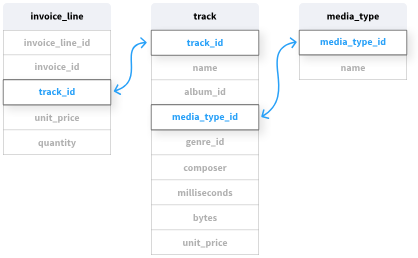

1. Join the three tables to produce some tables as practice. 
2. How many track of each media type? 
3. How many tracks are sold of each media type? 
4. What's the total sales by each media type? 

### Task 1: Join the three tables and produce some columns

In [60]:
query = '''
SELECT t.track_id, t.name AS track_name, 
       m.name AS media_type_name,
       il.unit_price,
       il.quantity
  FROM track AS t
  JOIN media_type AS m
    ON t.media_type_id = m.media_type_id
  JOIN invoice_line AS il
    ON t.track_id = il.track_id
'''

print_query_outcome(chinook, query)

4757 rows found .... 

['track_id', 'track_name', 'media_type_name', 'unit_price', 'quantity'] 

(1158, 'Right Next Door to Hell', 'Protected AAC audio file', 0.99, 1)
(1159, "Dust N' Bones", 'Protected AAC audio file', 0.99, 1)
(1160, 'Live and Let Die', 'Protected AAC audio file', 0.99, 1)
(1161, "Don't Cry (Original)", 'Protected AAC audio file', 0.99, 1)
(1162, 'Perfect Crime', 'Protected AAC audio file', 0.99, 1)
(1163, "You Ain't the First", 'Protected AAC audio file', 0.99, 1)
(1164, 'Bad Obsession', 'Protected AAC audio file', 0.99, 1)
(1165, 'Back off Bitch', 'Protected AAC audio file', 0.99, 1)
(1166, "Double Talkin' Jive", 'Protected AAC audio file', 0.99, 1)
(1167, 'November Rain', 'Protected AAC audio file', 0.99, 1)
(1168, 'The Garden', 'Protected AAC audio file', 0.99, 1)
(1169, 'Garden of Eden', 'Protected AAC audio file', 0.99, 1)
(1170, "Don't Damn Me", 'Protected AAC audio file', 0.99, 1)
(1171, 'Bad Apples', 'Protected AAC audio file', 0.99, 1)
(1172, 'Dead Horse', 

### Task 2: How many track of each media type?

In [61]:
# Only need to join media type and track tables to fetch this information

query = '''
SELECT m.media_type_id, m.name AS media_type_name,
       COUNT(*) AS num_of_tracks
  FROM track AS t
  JOIN media_type AS m
    ON t.media_type_id = m.media_type_id
 GROUP BY m.media_type_id
 ORDER BY COUNT(*) DESC
'''

print_query_outcome(chinook, query)

5 rows found .... 

['media_type_id', 'media_type_name', 'num_of_tracks'] 

(1, 'MPEG audio file', 3034)
(2, 'Protected AAC audio file', 237)
(3, 'Protected MPEG-4 video file', 214)
(5, 'AAC audio file', 11)
(4, 'Purchased AAC audio file', 7)


### Task 3V: How many tracks are sold of each media type?

In [62]:
# Now we will join invoice line as well and try and add information on the total quantity

query = '''
SELECT m.media_type_id, m.name AS media_type_name,
       SUM(il.quantity) AS quantity_sold,
       ROUND(AVG(il.unit_price),2) AS avg_unit_price
  FROM track AS t
  JOIN media_type AS m
    ON t.media_type_id = m.media_type_id
  JOIN invoice_line AS il
    ON t.track_id = il.track_id
 GROUP BY m.media_type_id
 ORDER BY SUM(il.quantity) DESC
'''

print_query_outcome(chinook, query)

5 rows found .... 

['media_type_id', 'media_type_name', 'quantity_sold', 'avg_unit_price'] 

(1, 'MPEG audio file', 4259, 0.99)
(2, 'Protected AAC audio file', 439, 0.99)
(4, 'Purchased AAC audio file', 35, 0.99)
(5, 'AAC audio file', 21, 0.99)
(3, 'Protected MPEG-4 video file', 3, 0.99)


### Task 4: What's the total sales by each media type?

In [63]:
# Join all the three tables to calculate the total sales. 

query = '''
SELECT m.media_type_id, m.name AS media_type_name,
       SUM(il.quantity) AS quantity_sold,
       ROUND(SUM (il.unit_price * il.quantity), 2) AS total_sales
  FROM track AS t
  JOIN media_type AS m
    ON t.media_type_id = m.media_type_id
  JOIN invoice_line AS il
    ON t.track_id = il.track_id
 GROUP BY m.media_type_id
 ORDER BY SUM(il.quantity) DESC
'''

print_query_outcome(chinook, query)

5 rows found .... 

['media_type_id', 'media_type_name', 'quantity_sold', 'total_sales'] 

(1, 'MPEG audio file', 4259, 4216.41)
(2, 'Protected AAC audio file', 439, 434.61)
(4, 'Purchased AAC audio file', 35, 34.65)
(5, 'AAC audio file', 21, 20.79)
(3, 'Protected MPEG-4 video file', 3, 2.97)


**Let's revisit the order of clauses** <br>

Below is the usual form of a SQL query we should refer to:

**SELECT columns, AGGREGATING_FUNCTION(expression)<br>
    FROM a_table<br>
  JOIN another_table<br>
    ON a_table.some_column = another_table.some_column<br>
 WHERE a_condition<br>
 GROUP BY columns<br>
HAVING some_condition<br>
 ORDER BY some_columns<br>
 LIMIT N;**

# Self Join 

In addition to joining different tables, it's also possible (and meaningful) to join a table with itself.

In Chinook's schema diagram, there's a table that has a relation with itself:

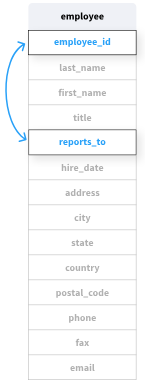
The reports_to column identifies each employee's supervisor. If we want to create a table where each row displays information about an employee and their manager, we can join employee with itself:

In [65]:
# An exmaple of self join to find who is the manager of each of the employee 

# If we do only join it will return the values that exist in both

query = '''
SELECT emp.employee_id AS employee_id, emp.first_name, emp.last_name, emp.title, emp.reports_to AS manager_id,
       manager.first_name AS manager_first_name, manager.last_name AS manager_last_name
  FROM employee AS emp
  JOIN employee AS manager
    ON emp.reports_to = manager.employee_id
'''

print_query_outcome(chinook, query)


7 rows found .... 

['employee_id', 'first_name', 'last_name', 'title', 'manager_id', 'manager_first_name', 'manager_last_name'] 

(2, 'Nancy', 'Edwards', 'Sales Manager', 1, 'Andrew', 'Adams')
(3, 'Jane', 'Peacock', 'Sales Support Agent', 2, 'Nancy', 'Edwards')
(4, 'Margaret', 'Park', 'Sales Support Agent', 2, 'Nancy', 'Edwards')
(5, 'Steve', 'Johnson', 'Sales Support Agent', 2, 'Nancy', 'Edwards')
(6, 'Michael', 'Mitchell', 'IT Manager', 1, 'Andrew', 'Adams')
(7, 'Robert', 'King', 'IT Staff', 6, 'Michael', 'Mitchell')
(8, 'Laura', 'Callahan', 'IT Staff', 6, 'Michael', 'Mitchell')


In [70]:
# Left join will give us all the employees even if they don't have a manager

query = '''
SELECT emp.employee_id AS employee_id, emp.first_name, emp.last_name, emp.title, emp.reports_to AS manager_id,
       manager.first_name AS manager_first_name, manager.last_name AS manager_last_name
  FROM employee AS emp
  LEFT JOIN employee AS manager
    ON emp.reports_to = manager.employee_id
'''

print_query_outcome(chinook, query)


8 rows found .... 

['employee_id', 'first_name', 'last_name', 'title', 'manager_id', 'manager_first_name', 'manager_last_name'] 

(1, 'Andrew', 'Adams', 'General Manager', None, None, None)
(2, 'Nancy', 'Edwards', 'Sales Manager', 1, 'Andrew', 'Adams')
(3, 'Jane', 'Peacock', 'Sales Support Agent', 2, 'Nancy', 'Edwards')
(4, 'Margaret', 'Park', 'Sales Support Agent', 2, 'Nancy', 'Edwards')
(5, 'Steve', 'Johnson', 'Sales Support Agent', 2, 'Nancy', 'Edwards')
(6, 'Michael', 'Mitchell', 'IT Manager', 1, 'Andrew', 'Adams')
(7, 'Robert', 'King', 'IT Staff', 6, 'Michael', 'Mitchell')
(8, 'Laura', 'Callahan', 'IT Staff', 6, 'Michael', 'Mitchell')


In [71]:
# Now we will see how we can find who all are managers and what are their names and titles. 

query = '''
SELECT DISTINCT manager.employee_id, 
       manager.first_name AS manager_first_name, 
       manager.title AS manager_title
  FROM employee AS manager
  JOIN employee AS emp
    ON emp.reports_to = manager.employee_id
'''

print_query_outcome(chinook, query)


3 rows found .... 

['employee_id', 'manager_first_name', 'manager_title'] 

(1, 'Andrew', 'General Manager')
(2, 'Nancy', 'Sales Manager')
(6, 'Michael', 'IT Manager')


In [72]:
# Now let's count employee who report to them.

query = '''
SELECT manager.employee_id, 
       manager.first_name AS manager_first_name, 
       manager.title AS manager_title,
       COUNT(*) AS no_of_staff
  FROM employee AS manager
  JOIN employee AS emp
    ON emp.reports_to = manager.employee_id
 GROUP BY manager.employee_id
 '''

print_query_outcome(chinook, query)

3 rows found .... 

['employee_id', 'manager_first_name', 'manager_title', 'no_of_staff'] 

(1, 'Andrew', 'General Manager', 2)
(2, 'Nancy', 'Sales Manager', 3)
(6, 'Michael', 'IT Manager', 2)
